In [148]:
source(file = '../../sigir2024-rbo/src/simulate.R')

In [149]:
library(data.table)

In [150]:
rankings <- simulate_rankings(len_x = 1000, len_y = 1000, n = 1000, frac_ties_x = 0.5, frac_ties_y = 0.5)

In [151]:
x <- rankings$x
y <- rankings$y

In [152]:
indices <- seq_along(x)
lengths <- sapply(x, length)

result_df <- data.frame(matrix(lengths, nrow = 1, dimnames = list(NULL, indices)))

lengths_vector <- as.vector(t(result_df))

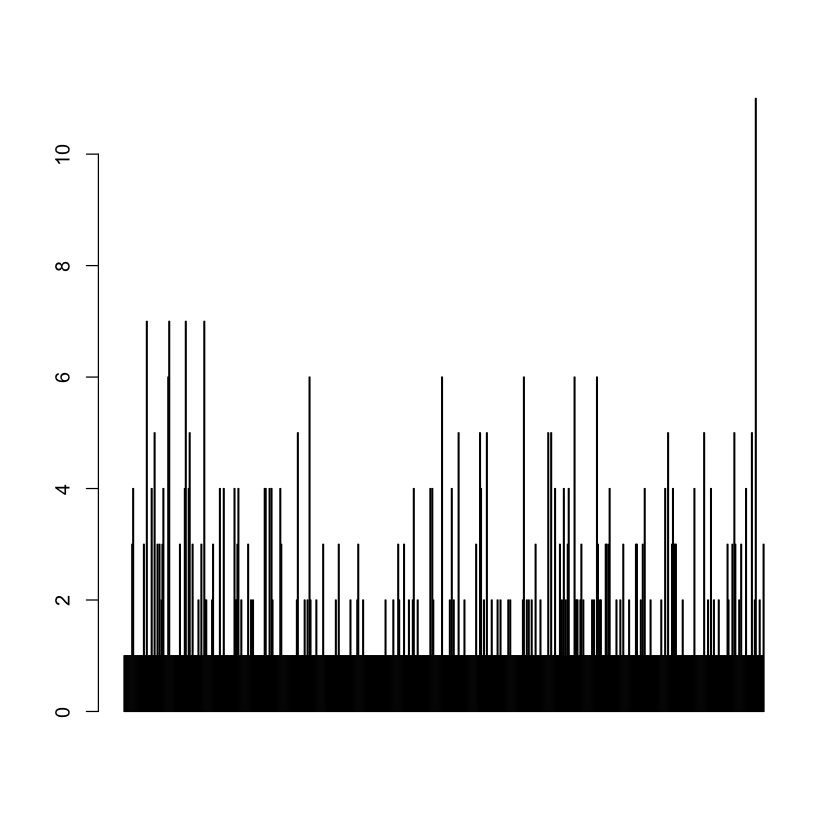

In [153]:
barplot(lengths_vector)

Tie lengths - find tie lengths and plot as a histogram. Then try to fit distributions - normal, uniform, beta, gamma etc.
- doing this for the marginal distribution (i.e. without the influence of the other ranking as we do not expect a relationship between the length of ties in `X` and the length of ties in `Y` - perhaps further investigation?

In [154]:
# Function that 1) simulates rankings, 2) outputs a frequency of ties
# we fix frac_ties_x to 0.5 - possibly another parameter?

get_tie_lengths <- function(len_x = 1000, n = 1000, frac_ties = 0.5) {
    rankings <- simulate_rankings(len_x = len_x, len_y = len_x, n = n, frac_ties_x = frac_ties)

    x <- rankings$x

    # for each rank, if there is a tie, add it to some sort of key-value store where key = tie-length and value = frequency
    indices <- seq_along(x)
    lengths <- sapply(x, length)

    result_df <- data.frame(matrix(lengths, nrow = 1, dimnames = list(NULL, indices)))

    lengths_vector <- as.vector(t(result_df))

    lengths_vector
    
    
}

Depth of ties, plot the barplot and inspect further...

In [137]:
table1 <- table(get_tie_lengths(frac_ties = 0.4))

In [138]:
table2 <- table(get_tie_lengths(frac_ties = 0.4))

In [139]:
table1


  1   2   3   4   5 
600 106  43  11   3 

In [140]:
table2


  1   2   3   4   5   6   7   8   9 
600  48  24  21  13   6   2   3   1 

In [141]:
all_columns <- unique(c(colnames(table1), colnames(table2)))

# Create a new table with these columns, initializing with zeros
result_table <- matrix(0, nrow = 1, ncol = length(all_columns))
colnames(result_table) <- all_columns

# Add values from table1
for (col in colnames(table1)) {
  result_table[, col] <- result_table[, col] + as.numeric(table1[, col])
}

# Add values from table2
for (col in colnames(table2)) {
  # Ensure the column exists in result_table; if not, it will be ignored
  if (col %in% colnames(result_table)) {
    result_table[, col] <- result_table[, col] + as.numeric(table2[, col])
  }
}

# Convert result back to a table if necessary
result_table <- as.table(result_table)

ERROR: Error in dimnames(x)[[2L]]: subscript out of bounds
